# MOwNiT – interpolacja zagadnienie Lagrange'a

__Przygotował:__
__Szymon Budziak__

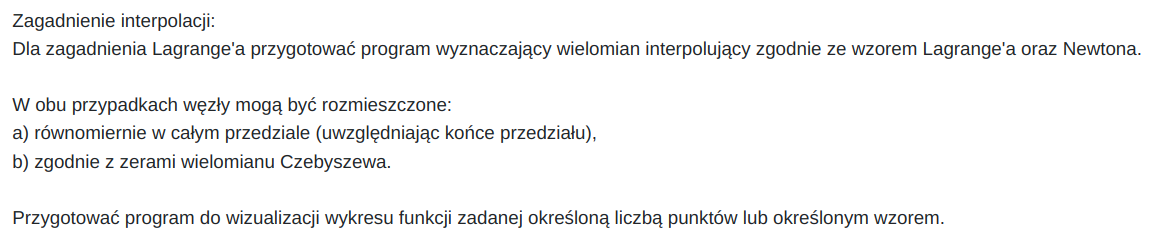

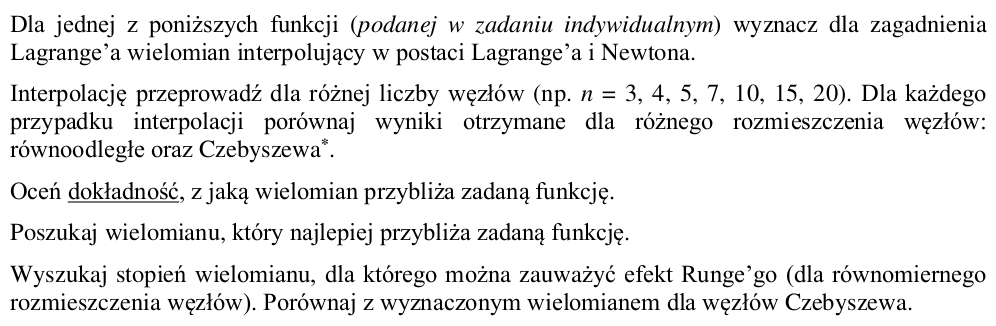

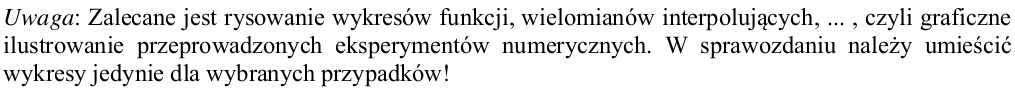

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [2]:
def even_distribution(start, stop, n):
    return np.linspace(start, stop, num=n)

In [3]:
def chebyshev_distribution(start, stop, n):
    chebyt_roots = []
    for k in range(1, n+1):
        cosin = np.cos((2*k-1)/(2*n) * np.pi)
        curr_result = 0.5*(start+stop) + 0.5*(stop-start)*cosin
        chebyt_roots.append(curr_result)
    return np.array(chebyt_roots)

## Function to interpolate

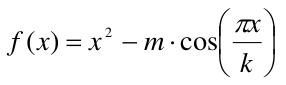

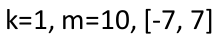

In [4]:
def func_to_interpolate(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

**Plot of the function**

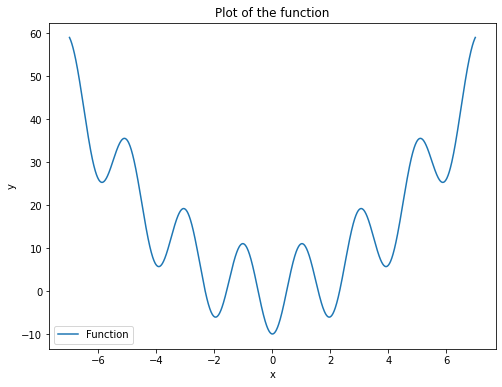

In [5]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func_to_interpolate(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [6]:
def visualize_scipy(x, y, function, n):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(-7, 7+0.01, 0.01)
    plt.plot(X, function(X), label = "Lagrange", color="blue")
    plt.plot(X, func_to_interpolate(X), label = "Function", color="red")
    plt.title(f"Lagrange'a Polynomial Interpolation using SciPy on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [7]:
def visualize(x, y, function, n):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(-7, 7+0.01, 0.01)
    plt.plot(X, func_to_interpolate(X), label = "Function",color="red")
    if function.__name__ == "lagrange_interpolation":
        plt.plot(X, function(X, x, y), label = "Lagrange", color="blue")
        plt.title(f"Lagrange'a Polynomial Interpolation on {n} nodes")
    elif function.__name__ == "newton_interpolation":
        plt.plot(X, function(X, x, y), label = "Newton", color="blue")
        plt.title(f"Newton’s Polynomial Interpolation on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [8]:
def max_error(X1, X2):
    return max([abs(X1[i] - X2[i]) for i in range(len(X1))])

In [9]:
def sum_square_error(X1, X2):
    return sum([(X1[i] - X2[i])**2 for i in range(len(X1))])

## Lagrange'a Polynomial Interpolation

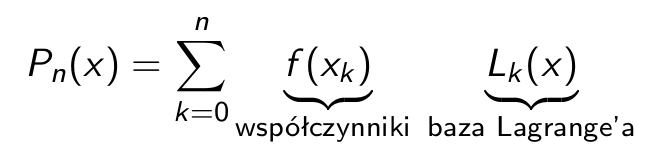

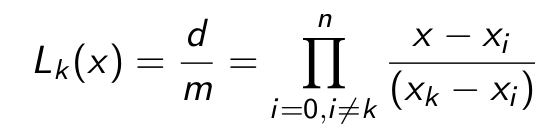

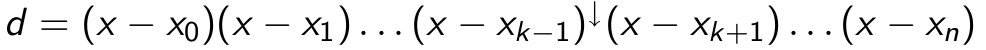
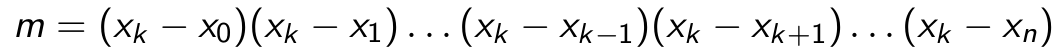

### using scipy

In [10]:
def even_lagrange_scipy(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    even_poly = lagrange(even_x, even_y)
    visualize_scipy(even_x, even_y, even_poly, n)

In [11]:
def chebyt_lagrange_scipy(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    chebyt_poly = lagrange(chebyt_x, chebyt_y)
    visualize_scipy(chebyt_x, chebyt_y, chebyt_poly, n)

**n = 3**

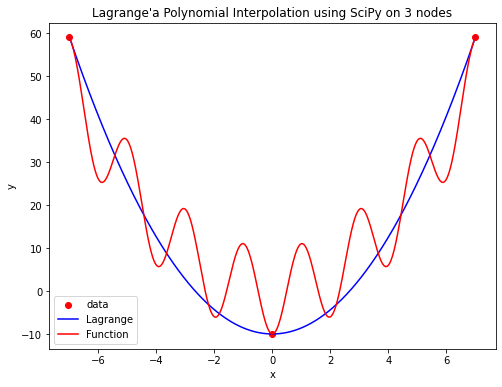

In [12]:
even_lagrange_scipy(-7, 7, 3)

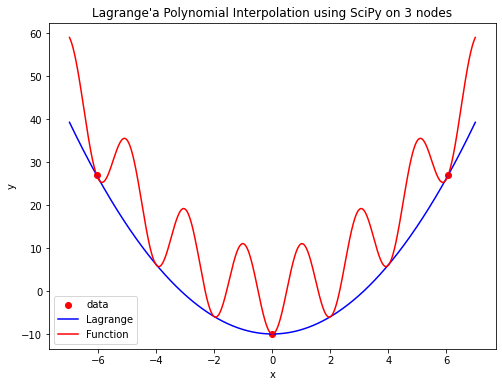

In [13]:
chebyt_lagrange_scipy(-7, 7, 3)

**n = 10**

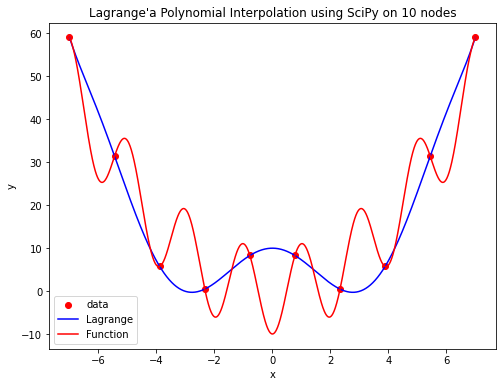

In [14]:
even_lagrange_scipy(-7, 7, 10)

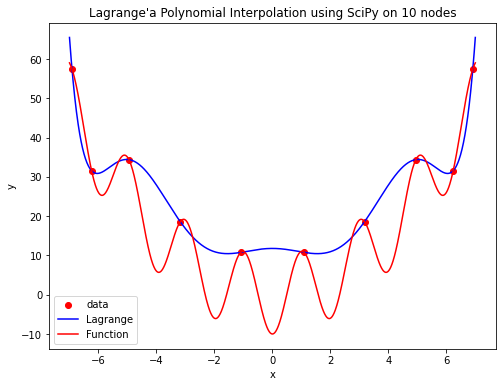

In [15]:
chebyt_lagrange_scipy(-7, 7, 10)

### own implementation

In [16]:
def calculate_Lk(X, xk, k, x_points):
    d = m = 1
    for i in range(len(x_points)):
        if i != k:
            d *= (X - x_points[i])
    for i in range(len(x_points)):
        if i != k:
            m *= (xk - x_points[i])
    return d/m

def lagrange_interpolation(X, x, y):
    result = 0
    for k in range(len(x)):
        result += y[k] * calculate_Lk(X, x[k], k, x)
    return result

In [17]:
def even_lagrange_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    visualize(even_x, even_y, lagrange_interpolation, n)

In [18]:
def chebyt_lagrange_own_implementation(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    visualize(chebyt_x, chebyt_y, lagrange_interpolation, n)

**n = 5**

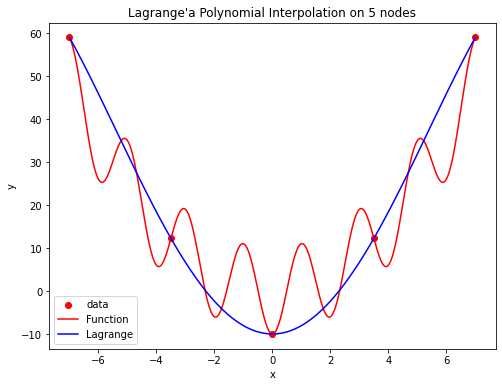

In [19]:
even_lagrange_own_implementation(-7, 7, 5)

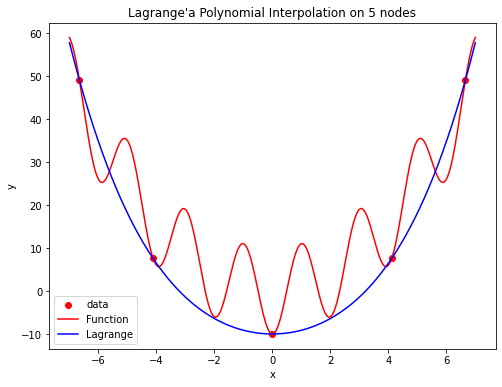

In [20]:
chebyt_lagrange_own_implementation(-7, 7, 5)

**n = 20**

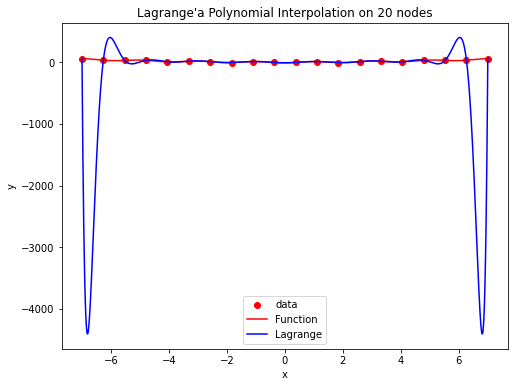

In [21]:
even_lagrange_own_implementation(-7, 7, 20)

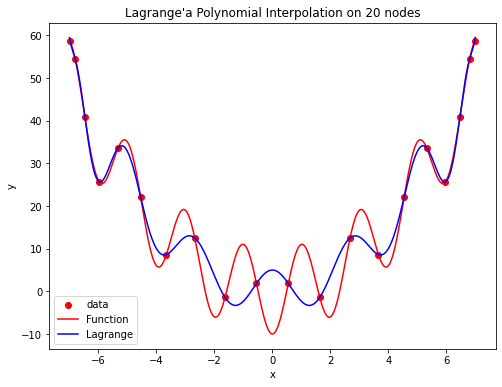

In [22]:
chebyt_lagrange_own_implementation(-7, 7, 20)

## Newton’s Polynomial Interpolation

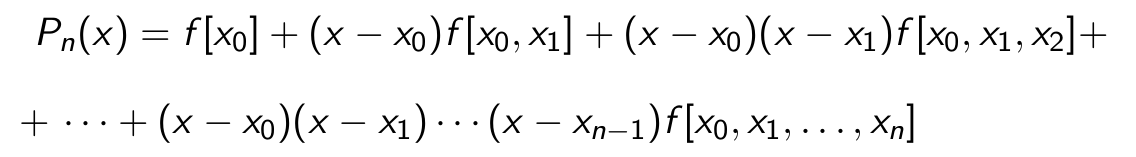

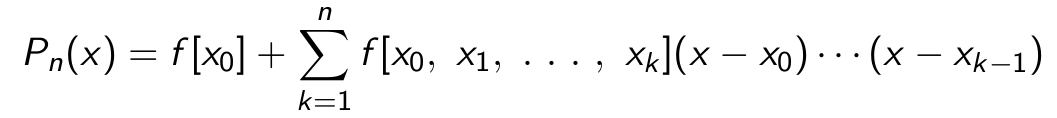

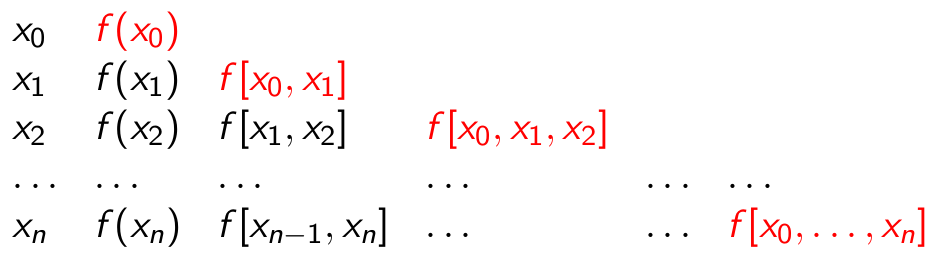

### own implementation

In [23]:
def newton_interpolation(X, x, y):
    table_of_dd = [[None for _ in range(len(x))] for _ in range(len(x))]
    y_values = [None for _ in range(len(x))]
    
    for i in range(len(x)):
        table_of_dd[i][0] = y[i]
    for j in range(1, len(x)):
        for i in range(len(x)-j):
            table_of_dd[i][j] = (table_of_dd[i+1][j-1] - table_of_dd[i][j-1])/(x[i+j]-x[i])
            
    xterm = 1
    y_values[0] = table_of_dd[0][0]
    for i in range(1, len(x)):
        xterm *= (X - x[i-1])
        y_values[i] = y_values[i-1] + table_of_dd[0][i]*xterm
        
    return y_values[-1]

In [24]:
def even_newton_own_implementation(start, stop, n):
    # even distribution
    even_x = even_distribution(start, stop, n)
    even_y = func_to_interpolate(even_x)
    visualize(even_x, even_y, newton_interpolation, n)

In [25]:
def chebyt_newton_own_implementation(start, stop, n):
    # chebyshev distribution
    chebyt_x = chebyshev_distribution(start, stop, n)
    chebyt_y = func_to_interpolate(chebyt_x)
    visualize(chebyt_x, chebyt_y, newton_interpolation, n)

**n = 4**

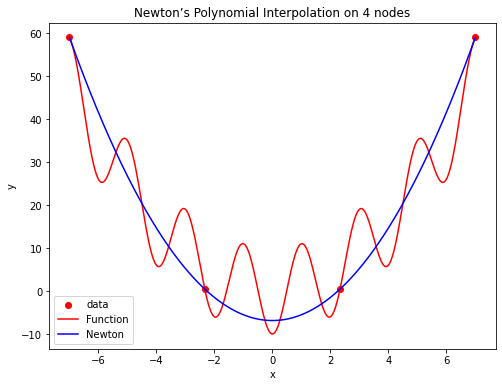

In [26]:
even_newton_own_implementation(-7, 7, 4)

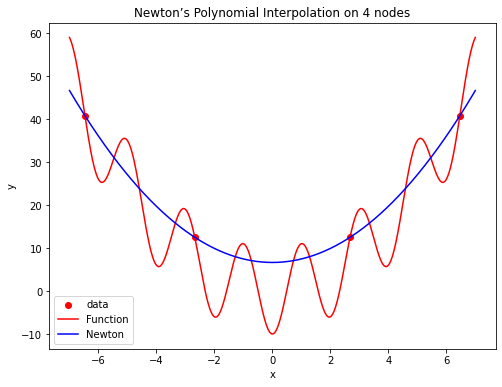

In [27]:
chebyt_newton_own_implementation(-7, 7, 4)

**n = 7**

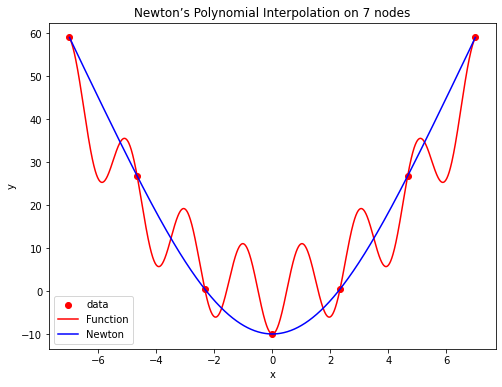

In [28]:
even_newton_own_implementation(-7, 7, 7)

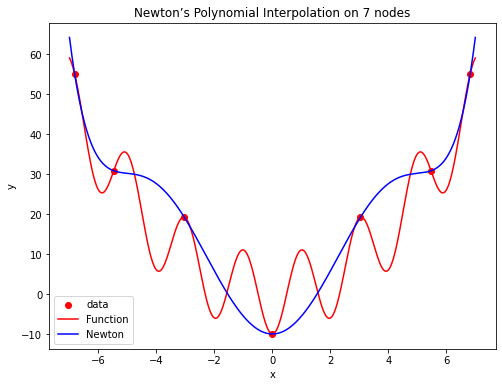

In [29]:
chebyt_newton_own_implementation(-7, 7, 7)

**n = 15**

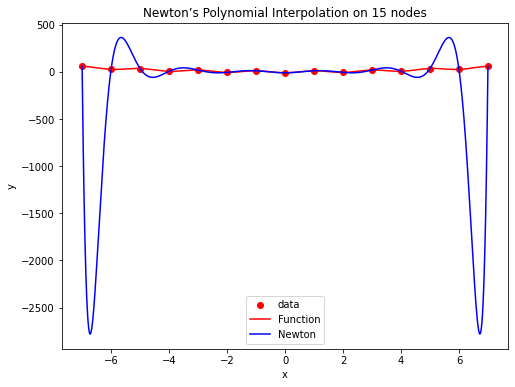

In [30]:
even_newton_own_implementation(-7, 7, 15)

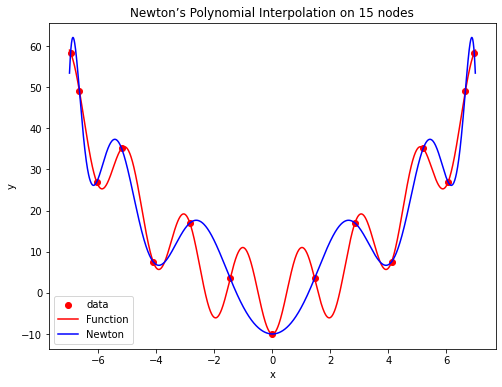

In [31]:
chebyt_newton_own_implementation(-7, 7, 15)

## Error for Lagrange interpolation

In [32]:
def calcualte_error(start, stop, function):
    best_n = 0
    best_max_error = best_sum_sq_error = np.inf
    nodes = [3, 4, 5, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70, 80]
    max_error_list = [None for _ in range(len(nodes))]
    sum_sq_error_list = [None for _ in range(len(nodes))]
    df_result = pd.DataFrame()
    X = np.linspace(start, stop, 1000)
    for idx, n in enumerate(nodes):
        even_x = even_distribution(start, stop, n)
        even_y = func_to_interpolate(even_x)
        even_inter = function(X, even_x, even_y)
        
        chebyt_x = chebyshev_distribution(start, stop, n)
        chebyt_y = func_to_interpolate(chebyt_x)
        chebyt_inter = function(X, chebyt_x, chebyt_y)
        
        curr_max_error = max_error(even_inter, chebyt_inter)
        curr_sum_sq_error = sum_square_error(even_inter, chebyt_inter)
        if curr_max_error < best_max_error and curr_sum_sq_error < best_sum_sq_error:
            best_n = n
            best_max_error = curr_max_error
            best_sum_sq_error = curr_sum_sq_error
        max_error_list[idx] = curr_max_error
        sum_sq_error_list[idx] = curr_sum_sq_error
    return pd.DataFrame(data={"n":nodes, "max error": max_error_list, "sum square error":sum_sq_error_list})

In [33]:
lagrange_df = calcualte_error(-7, 7, lagrange_interpolation)
lagrange_df

,n,max error,sum square error
0,3,1.974643e+01,7.829676e+04
1,4,1.351731e+01,8.350172e+04
2,5,1.375071e+01,7.764523e+04
3,7,1.207159e+01,5.996696e+04
4,8,2.214978e+01,2.099495e+05
5,9,1.894289e+01,6.573902e+04
6,10,2.093197e+01,1.568087e+05
7,15,2.833347e+03,4.903954e+08
8,20,4.460198e+03,8.530243e+08
9,30,3.272240e+02,2.754693e+06


In [34]:
lag_idx = lagrange_df["max error"].idxmin()
lagrange_df["n"].iloc[lag_idx]

50

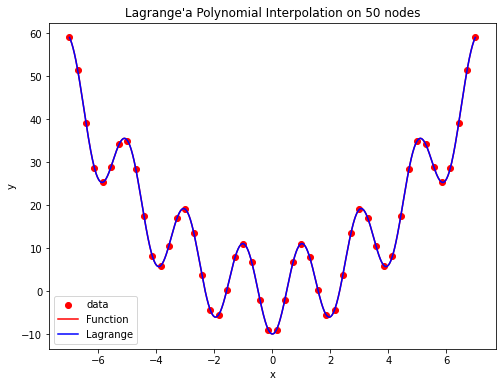

In [35]:
even_lagrange_own_implementation(-7, 7, 50)

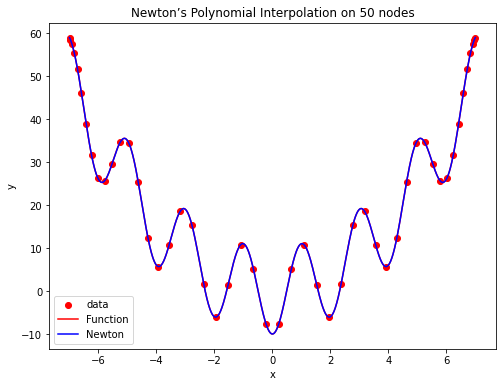

In [36]:
chebyt_newton_own_implementation(-7, 7, 50)

## Error for Newton interpolation

In [37]:
newton_df = calcualte_error(-7, 7, newton_interpolation)
newton_df

,n,max error,sum square error
0,3,1.974643e+01,7.829676e+04
1,4,1.351731e+01,8.350172e+04
2,5,1.375071e+01,7.764523e+04
3,7,1.207159e+01,5.996696e+04
4,8,2.214978e+01,2.099495e+05
5,9,1.894289e+01,6.573902e+04
6,10,2.093197e+01,1.568087e+05
7,15,2.833347e+03,4.903954e+08
8,20,4.460198e+03,8.530243e+08
9,30,3.272240e+02,2.754693e+06


In [38]:
newt_idx = newton_df["max error"].idxmin()
newton_df["n"].iloc[newt_idx]

50

Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który interpoluje naszą funkcję. W naszym przypadku jest to wielomian stopnia n = 50.

## Efekt Rungego

Efekt Rungego możemy zaobserwować już dla liczby węzłów równej 15. Możemy to zaobserwować na wykresach oraz na obliczonych błędach. Zobaczmy czy wcześniej (między 10 a 12) też występuje ten efekt.

__n = 11 - OK__

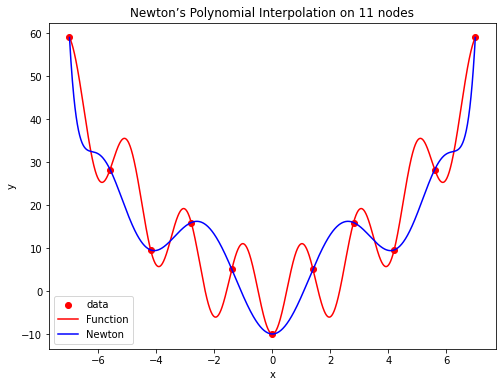

In [39]:
even_newton_own_implementation(-7, 7, 11)

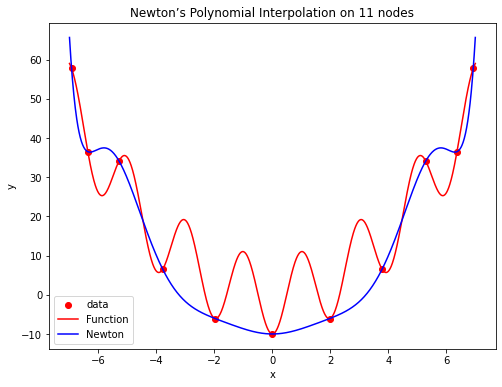

In [40]:
chebyt_newton_own_implementation(-7, 7, 11)

__n = 12 - efekt Rungego__

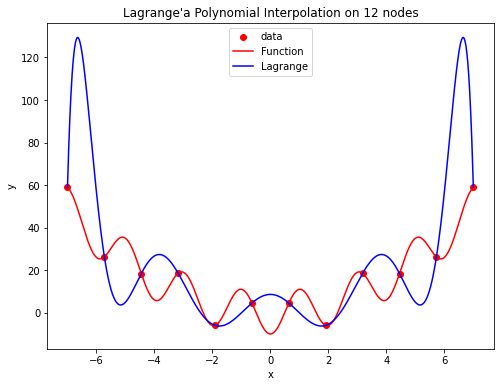

In [41]:
even_lagrange_own_implementation(-7, 7, 12)

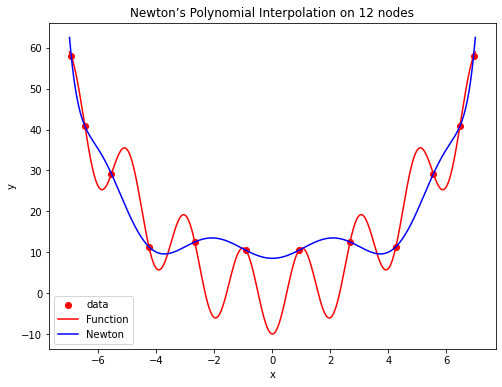

In [42]:
chebyt_newton_own_implementation(-7, 7, 12)

**n = 13 - efekt Rungego**

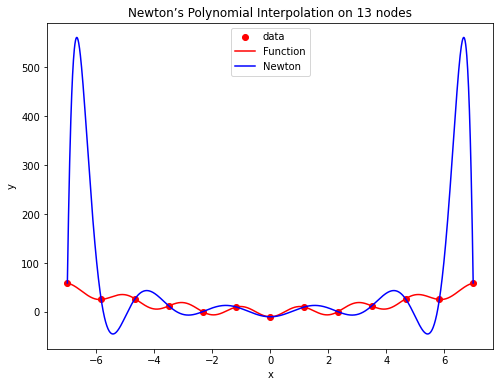

In [43]:
even_newton_own_implementation(-7, 7, 13)

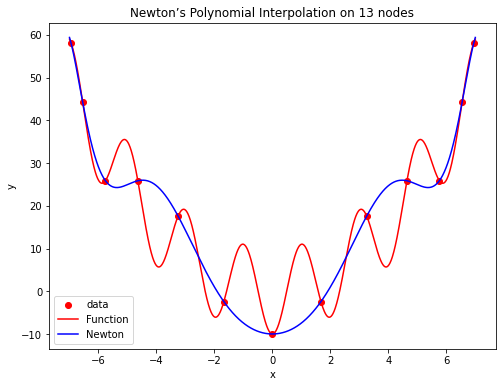

In [44]:
chebyt_newton_own_implementation(-7, 7, 13)

Dla n = 12 możemy już zaobserwować efekt Rungego dla węzłów rozmieszczonych równomiernie w całym przedziale.